In [119]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Exploratory Data Analysis
This notebook presents a thought process of predicting a continuous variable through Machine Learning methods. More specifically, we want to predict house prices based on multiple features using regression analysis.

The dataset is from f house sales in King County in Seattle.

In this notebook we will first apply some data analysis techniques to summarize the main characteristics of the dataset.

In [120]:
# We start loading some of the libraries that we might use later
import pandas as pd
import numpy as np
%matplotlib inline
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor
import warnings
warnings.filterwarnings('ignore')

#### Load data set

In [121]:
#We read the data set
df=pd.read_csv('kc_house_data.csv')

In [122]:
#Lets convert features to categorical 
df['waterfront'] = df['waterfront'].astype('category',ordered=True)
df['view'] = df['view'].astype('category',ordered=True)
df['condition'] = df['condition'].astype('category',ordered=True)
df['grade'] = df['grade'].astype('category',ordered=False)
df['zipcode'] = df['zipcode'].astype(str)
df.head(2) # Show the first 2 lines

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [123]:
#We format the date
#df['date']=df['date'].iloc[2][0:8]
#df['date'] = df['date'].astype('datetime64[s]')
##¿What should we do with the date?- better just to drop the date for this case, doesn't provide any important information.
df.drop(columns=['date'],inplace=True)

#### Descriptive Analysis

In [124]:
df.describe(include='all')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.0,21613.0,21613.0,21613.0,21613.000000,21613.000000,21613.000000,21613.000000,21613,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,5.0,12.0,NaN,NaN,NaN,NaN,70,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,NaN,98103,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21450.0,19489.0,14031.0,8981.0,NaN,NaN,NaN,NaN,602,NaN,NaN,NaN,NaN
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,NaN,NaN,NaN,NaN,1788.390691,291.509045,1971.005136,84.402258,NaN,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,NaN,NaN,NaN,NaN,828.090978,442.575043,29.373411,401.679240,NaN,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,NaN,NaN,NaN,NaN,290.000000,0.000000,1900.000000,0.000000,NaN,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,NaN,NaN,NaN,NaN,1190.000000,0.000000,1951.000000,0.000000,NaN,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,NaN,NaN,NaN,NaN,1560.000000,0.000000,1975.000000,0.000000,NaN,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,NaN,NaN,NaN,NaN,2210.000000,560.000000,1997.000000,0.000000,NaN,47.678000,-122.125000,2360.000000,10083.000000


#### Map Visualization

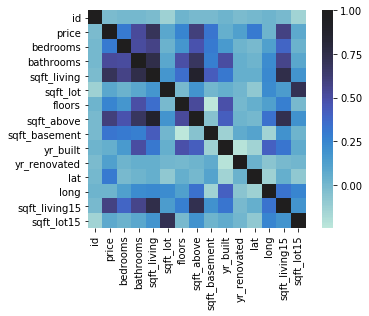

In [125]:
sns.heatmap(df.corr(),center=True,square=True)

In [126]:
#We look for the variables with the strongest correlation with price
correlation=df.corr()
correlation.sort_values(by='price',inplace=True)
price_correlation=pd.DataFrame(correlation['price'])

#price_correlation.plot.bar()
#With a simple correlation we can see that there are some variables with a higher correlation like the sqft_living
# and some others like zip code or id or longitud(earth) have lower correlation


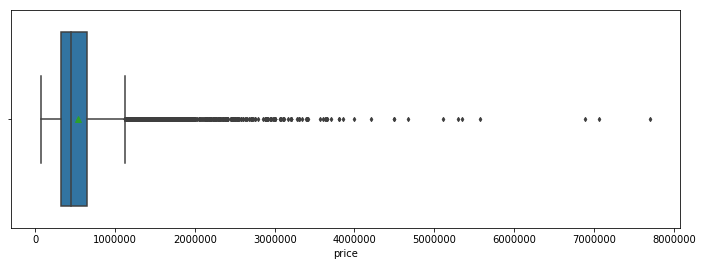

In [127]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'price', data = df, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()

There seems to be a lot of outliers at the top of the distribution, with a few houses above the 5000000\$ value. 

If we ignore outliers, the range is illustrated by the distance between the opposite ends of the whiskers (1.5 IQR) - about 1000000\$ here. 

Also, we can see that the right whisker is slightly longer than the left whisker and that the median line is gravitating towards the left of the box. The distribution is therefore slightly skewed to the right.

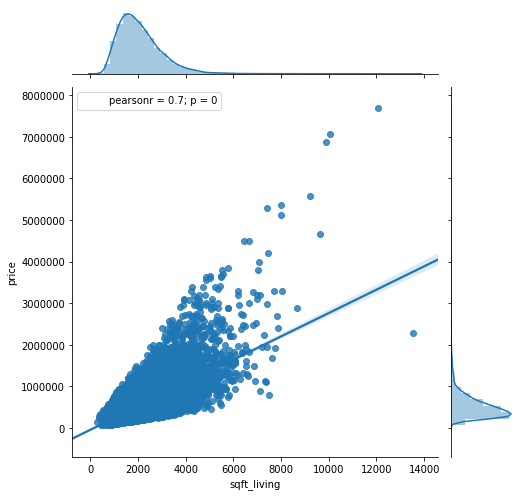

In [128]:
# A joint plot is used to visualize the bivariate distribution of our higher related variable
sns.jointplot(x="sqft_living", y="price", data=df, kind = 'reg', size = 7)
plt.show()

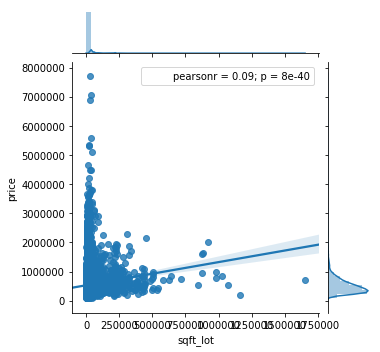

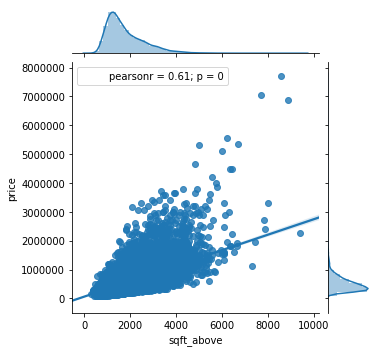

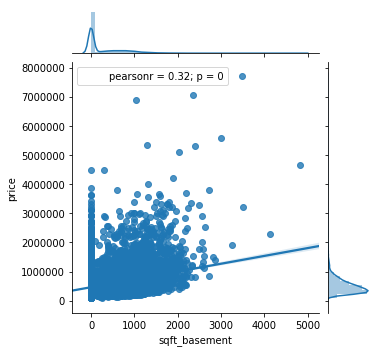

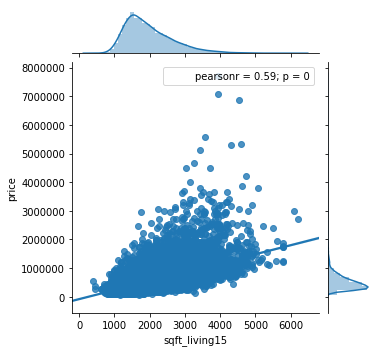

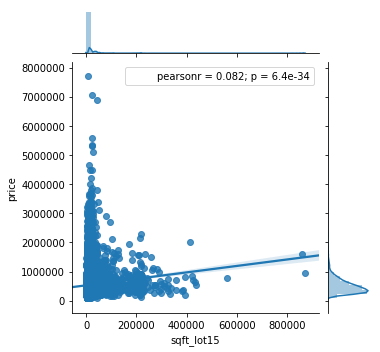

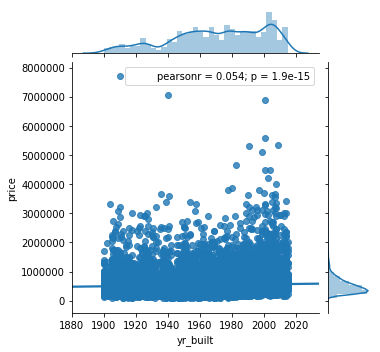

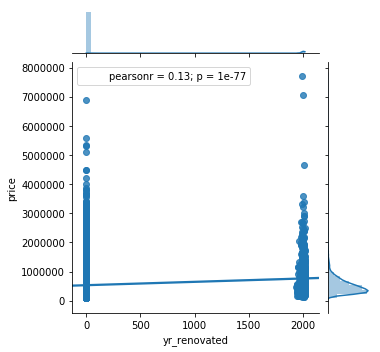

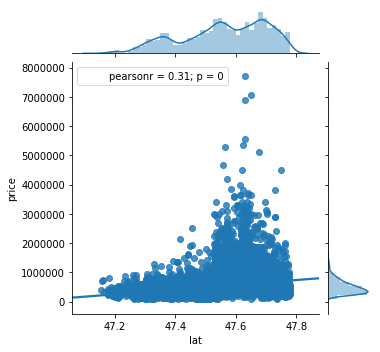

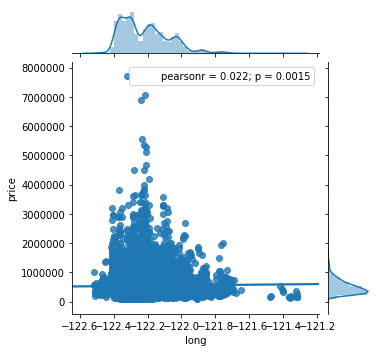

In [129]:
sns.jointplot(x="sqft_lot", y="price", data=df, kind = 'reg', size = 5)
sns.jointplot(x="sqft_above", y="price", data=df, kind = 'reg', size = 5)
sns.jointplot(x="sqft_basement", y="price", data=df, kind = 'reg', size = 5)
sns.jointplot(x="sqft_living15", y="price", data=df, kind = 'reg', size = 5)
sns.jointplot(x="sqft_lot15", y="price", data=df, kind = 'reg', size = 5)
sns.jointplot(x="yr_built", y="price", data=df, kind = 'reg', size = 5)
sns.jointplot(x="yr_renovated", y="price", data=df, kind = 'reg', size = 5)
sns.jointplot(x="lat", y="price", data=df, kind = 'reg', size = 5)
sns.jointplot(x="long", y="price", data=df, kind = 'reg', size = 5)
plt.show()

# Regressions
 Let's start by preparing the set for the regressions model 

In [ ]:
# We split the data into features and labeling and into test and train.
# We now have 4 groups with all the features
df_2=df.copy()
df_y=df_2['price']
df_2.drop(columns=['price'],inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df_2, df_y, random_state=0)


In [ ]:
df_3=df.copy()
df_3=df_3['sqft_living']
X_train_one_feature, X_test_one_feature, y_train_one_feature, y_test_one_feature = train_test_split(df_3, df_y, random_state=0)

X_train_one_feature=pd.DataFrame(X_train_one_feature)
X_test_one_feature=pd.DataFrame(X_test_one_feature)
y_train_one_feature=pd.DataFrame(y_train_one_feature)
y_test_one_feature=pd.DataFrame(y_test_one_feature)

In [ ]:
print('Xtest shape: '+str(X_test.shape)+'  Xtest shape one feature: '+str(X_test_one_feature.shape) )
print('Xtrain shape: '+str(X_train.shape) +'  Xtrain shape one feature: ' + str(X_train_one_feature.shape) )
print('Ytest shape: '+str(y_test.shape) +'  Ytest shape one feature: '+str(y_test_one_feature.shape) )
print('ytrain shape: '+str(y_train.shape) +'  ytrain shape one feature: '+str(y_train_one_feature.shape) )

# K Neirest Neighbors

## One Feature KNN

In [ ]:
tic=time.time()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled_one_feature = scaler.fit_transform(X_train_one_feature)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled_one_feature = scaler.transform(X_test_one_feature)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled_one_feature, y_train_one_feature)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled_one_feature, y_train_one_feature)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled_one_feature, y_test_one_feature)))
toc=time.time()
elapsedtime=np.abs(toc-tic)
print('The time taken to train the model is: {:.2f} s'
     .format(elapsedtime))

## All features KNN

In [ ]:
tic=time.time()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))
toc=time.time()
elapsedtime=np.abs(toc-tic)
print('The time taken to train the model is: {:.2f}'
     .format(elapsedtime))

In [ ]:
tic=time.time()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))
toc=time.time()
elapsedtime=np.abs(toc-tic)
print('R-squared test score: {:.3f}'
     .format(knn.score(X_test, y_test)))
print('The time taken to train the model is: {:.2f}'
     .format(elapsedtime))

We obtain a really low model for predicting one and all features.

We also see that it takes more time to train the model as the number of neighbors increases
 knn=5 t=6 knn=1000 t=120' and there is no better prediction
 
We noticed that there are no difference bt trainning a model with 20 features and one. 



### Conclusion
The Knn neighbors is not working properly. Reasons
- Because it is a classification algorithm and this is a prediction problem

Possible solutions
- Maybe if we put the gold data to salary zones e.g. $(<10k,10k<x<100k)$ we can closer it up as a classification problem

## Knn Regression

#### Knn Regression one feature

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
tic=time.time()
knnreg_one = KNeighborsRegressor(n_neighbors = 5).fit(X_train_one_feature, y_train_one_feature)

print(knnreg_one.predict(X_test_one_feature))
print('R-squared test score: {:.3f}'
     .format(knnreg_one.score(X_test_one_feature, y_test_one_feature)))
toc=time.time()
elapsedtime=np.abs(toc-tic)
print('The time taken to train the model is: {:.2f}'
     .format(elapsedtime))

#### Knn regression all features

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
tic=time.time()
knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))
toc=time.time()
elapsedtime=np.abs(toc-tic)
print('The time taken to train the model is: {:.2f}'
     .format(elapsedtime))

## Conclusion
Now after taking the Knn algorithm to predict instead of classify we obtain that  $R^2$ is 0.36 (all features) and 0.458 for just one featura (sqft_living).It works better with just one feature.

We get almost a 50%  of predicting prices with  just one variable in Knn regression

After seeing the graphical representation we see that the best Knn neighbors parameter is k=3 with we obtain a $R^2=0.536$

# Linear models for regression

## Linear Regression

In [ ]:
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

In [ ]:
#Linear regression one feature
linreg_one_feature = LinearRegression().fit(X_train_one_feature, y_train_one_feature)

print('R-squared score (training): {:.3f}'.format(linreg_one_feature.score(X_train_one_feature, y_train_one_feature)))
print('R-squared score (test): {:.3f}'.format(linreg_one_feature.score(X_test_one_feature, y_test_one_feature)))

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(df_3, df_y, marker= 'o', s=5, alpha=0.8)
df_3=pd.DataFrame(df_3)
b=linreg_one_feature.coef_ *df_3 + linreg_one_feature.intercept_
plt.plot(df_3,b, 'r-')
plt.title('Least-squares linear regression for one feature')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
#plt.ylim((0,600))
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.show()

In [ ]:
#Seaborn graph of Price vs sqft living, takes too much time to load


#plt.figure()
#sns.jointplot(df['price'], df['sqft_living'], kind='kde', space=0);
#plt.title('Price vs sqft_living')
#plt.show()

### Conclusion for linear regression
After applying the algorithm to predict instead of classify we obtain that  R^2 is 0.537 (all features) and 0.462 for just one featura (sqft_living)



### Ridge regression

In [ ]:
linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Linear All features')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Now we will try to use the feature scalling which will help Ridge linear regression to adjust better 

In [ ]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge_scaled = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('All features')
print('ridge regression linear model intercept: {}'
     .format(linridge_scaled.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge_scaled.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge_scaled.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge_scaled.coef_ != 0)))

#### Ridge regression with regularization parameter: alpha

In [ ]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0,0.5, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.3f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

### Ridge regression conclussions
We have run 3 different models: 
-  Ridge Linear model all features  $R^2=0.537$
-  RidgeLinear model all features scaled  $R^2=-2.6$ I DONT KNOW HOW YOU GET THAT OR WHAT IT MEANS
-  RidgeLinear model all features with different alphas, we obtain the best model with an alpha parametrization between 0.5-1  $R^2=0.540$


That means the Ridge regression doesn't work much better than linear regression for this case.
    


### Lasso regression

In [ ]:
linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)


print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))


#### Lasso regression with the effect of alpha regularization

In [ ]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [ 1, 10, 100, 500, 1000, 5000, 10000]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

### Lasso regression conclusion
We are obtaining results for Lasso regression of $R^2=0.69$. And the best alpha parameter is between 1-500. We obeserve that for  low alphas the results are better.


That is, when alpha is 0, Lasso regression produces the same coefficients as a linear regression. When alpha is very very large, all coefficients are zero.

So the Lasso regression is not working better than linear regression.

## Linear regression conclusion
After building differtent linear models (squared error, ridge and lasso) we obtain that the best predictions are for  Ordinary Least Squares Regression model.
With an $R^2=0.696$ in the test set at best.

##  Polynomial regression

### Degree = 2

In [ ]:
print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(df_2)
X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, df_y,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)


print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, df_y,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)


print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

In [ ]:
print('\nNow we transform the original input data to add\n\
polynomial features up to degree 3 (cubic)\n')
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(df_2)
X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, df_y,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)


print('(poly deg 3) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 3) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, df_y,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)


print('(poly deg 3 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 3 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

### Polynomial regressions conclussion
After applying polynomial regressions of degree 2 and 3 we see that the performance of the model is better with degree=2 than degree=3.


We also see that applying polynomial regression with Ridge regression doesn't improve much the situation.

After applying KNN class, KNN regression, KNN regression one feature, linear, linear ridge, linera lasso, linear one feature, linear ridge one feature, square regression, square with ridge, cubic regression and cubic regression with ridge. We see that the best model is linear regression with all features.

# Support Vector Machines

In [ ]:
clf = SVR( C=1.0, epsilon=0.2)
clf.fit(X_train_one_feature, y_train_one_feature)
print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train_one_feature, y_train_one_feature)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test_one_feature, y_test_one_feature)))

## They just take to much time to computed
and with one variable it just doesnt make nothing

## Dummy Classifier
Just to make sure that the model is making some predicitions we implement teh Dummy regressor

In [ ]:
dummy_majority = DummyRegressor(strategy = 'mean').fit(X_train, y_train)
y_dummy_predictions = dummy_majority.predict(X_test)

print('Dummy score with mean : {:.4f}'
     .format(dummy_majority.score(X_test, y_test)))

We see that the score is really different from the regression values, so the ML model has actually learn something

# Conclusion

In this project I have tried to give on overview of regression methods using the given data set. We have applyied a KNN regression, KNN classifiers, Linear, Linear Lasso, Linear Ridge, Polynomial, Polynomial Ridge, Polynomial Lasso, Support Vector Machines, Decision Tree. There is many more models to apply Elastic Net, kernel regression, Bayesian regression, NN, CNN, random forest etc.
Since we want to give an overview of the most basic models we cant stop here. We have achieved $R^2=0.700$ in the test set with out applying any extreme difficult Artificial Intelligence algorithm.